In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import SVG, display, display_png 
import plotly.io as pio 

from datetime import datetime

import os

<b style = "color:lightblue">OS GRÁFICOS DO PLOTLY AINDA NÃO ESTÃO EM DASHBOARD, PRECISAM SER BAIXADOS E EXECUTADOS PARA QUE POSSAM SER USADOS</b>

In [2]:
dir_path = os.listdir(r'dados')
names_f = [name.split('_')[1] for name  in dir_path] 
google = pd.read_csv(r'google/multiTimeline.csv')

In [3]:
# carrega os dados em um dicionário
categories = {}
for path,names in zip(dir_path,names_f):
    categories[names] = pd.read_excel(rf'dados\{path}')
    categories[names] = categories[names].drop(['Unnamed: 0'], axis = 1)

In [4]:
#função responsável pela contagem de colunas
def count_columns(dataframe, column = str, target_column = str, unique_count = False):
  df = dataframe
  count_all = {}
  uniques = df[target_column].unique()
  for i in uniques:
    count_all[i] = df.query(f'{target_column} == {i}')[column].sum()
  count_all_df = pd.DataFrame(list(count_all.items())).rename({0: target_column, 1: column}, axis = 1).sort_values(by = [target_column])
  return count_all_df

In [5]:
estoque_preco = {}

for i in categories.keys():
    estoque_preco[i] = [count_columns(categories[i],'Estoque', 'Mês'),count_columns(categories[i],'Preço', 'Mês')]

In [6]:
#transforma as colunas de divisão de data em um datetime
for i in categories:
    data = []
    for j in range(len(categories[i])):
        str_date = f'{categories[i].Dia[j]}/{categories[i].Mês[j]}/{categories[i].Ano[j]}'
        str_date = datetime.strptime(str_date,'%d/%m/%Y')
        str_date = str_date.date()
        data.append(str_date)
    categories[i]['Data'] = data

In [7]:
#função de diminuição de dimensionalidade de listas
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

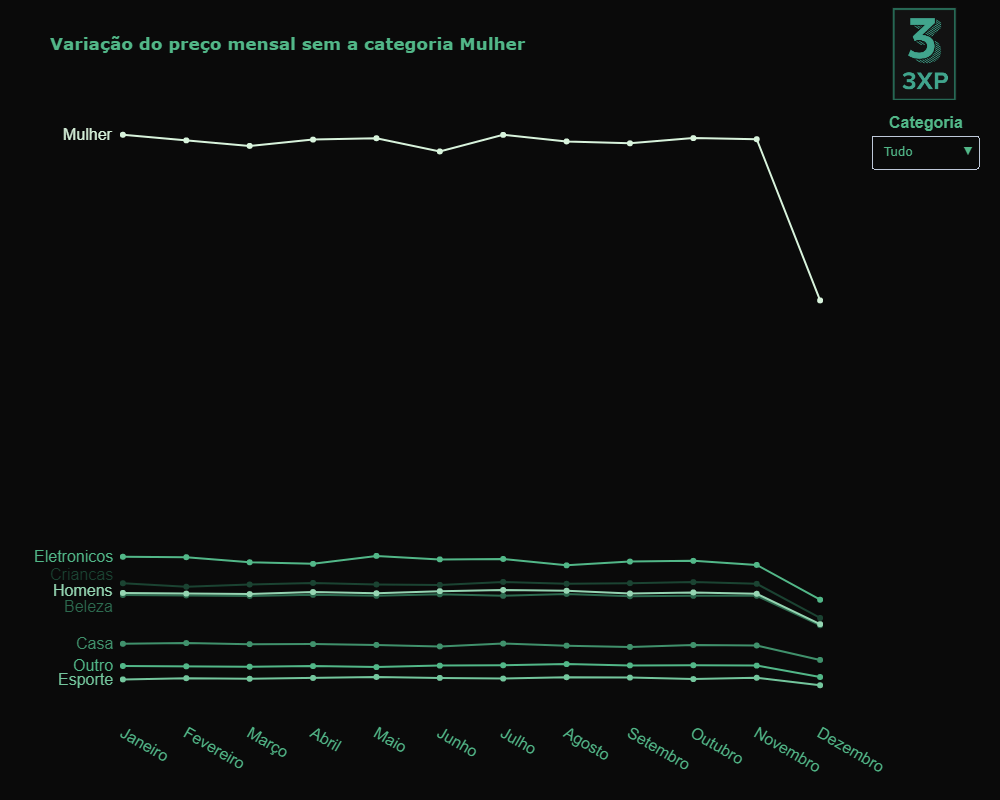

In [8]:
color = {'green_palette': ['#2d6a4f', '#40916c', '#1b4332', '#52b788', '#74c69d', '#95d5b2','#d8f3dc','#52b788']}
fig = go.Figure()
annotations = []
#lista de pontos de anotação
position_list = [0,10,11]
all_list = []

for i,j in zip(categories,color['green_palette']):
        #lista com o texto que será escrito
        texto = [int(round(x,0)) for x in estoque_preco[i][1]['Preço'].reset_index(drop=True)]
        fig.add_trace(
        go.Scatter(
                x = estoque_preco[i][1]['Mês'].reset_index(drop=True),
                y = estoque_preco[i][1]['Preço'].reset_index(drop=True),
                legendgroup = i,
                marker_color = j,
                name = i,
                showlegend = False
                        ))
        #conjunto de código responsável por realizar as anotações na plotagem da figura de várias categorias
        #é feito uma quantidade grande de anotações exclusivas, pois caso não seja feito, as anotações terão problema, visto que a referência do eixo y está o proprio eixo y e não o papel
        #condicional para inserir anotações da categoria homem
        if i == 'Homens':
                fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+4000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ,))
                all_list.append(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+4000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))
        #condicional para inserir anotações da categoria crianças
        elif i == 'Criancas':
                fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+16000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ,))
                all_list.append(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+16000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))
        #condicional para inserir anotações da categoria beleza
        elif i == 'Beleza':
                fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]-20000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ,))
                all_list.append(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]-20000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))
        else:
                fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))
                all_list.append(dict(xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))

#all list é uma lista que será feita para adicionar o plot de todas as categorias
all_list.append(dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))
#anot é um dicionário responsável por adicionar anotações exclusivas, agora para plots por categoria
anot = {}
for i in categories.keys():
        #anotações do dropdown da casa
        if i == 'Casa':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]-600,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.01,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=estoque_preco[i][1]['Mês'].reset_index(drop=True)[10],
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+1000,
                        xref="x",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                        ]
        #anotações do dropdown de beleza
        elif i == 'Beleza':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+1000,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.92,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+1500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de crianças
        elif i == 'Criancas':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+1500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.92,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+1500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de eletronicos
        elif i == 'Eletronicos':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+2000,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+2000,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de esporte
        elif i == 'Esporte':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.07,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de homens
        elif i == 'Homens':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+1500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+1500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de mulher
        elif i == 'Mulher':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+8000,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+8000,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown do restante das categorias
        else:
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[0]+700,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][1]['Preço'].reset_index(drop=True)[10]+500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][1]['Preço'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]  
       

anot['Tudo'] = all_list

#configuração das anotações gerais e dos dropdowns
fig.update_layout(
    autosize = False,
    title = '<b style = "color:#52b788">Variação do preço mensal sem a categoria Mulher</b>',
    width=1000,
    height=800,
    paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
    plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
        updatemenus=[
                dict(
                buttons=list([
                        dict(
                        args=[{'visible': [True,True,True,True,True,True,True,True]},{'annotations': [i for i in anot['Tudo']]}],
                        label='Tudo',
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [True,False,False,False,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[0]]]}],
                        label=list(anot.keys())[0],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,True,False,False,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[1]]]}],
                        label=list(anot.keys())[1],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,True,False,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[2]]]}],
                        label=list(anot.keys())[2],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,True,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[3]]]}],
                        label=list(anot.keys())[3],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,True,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[4]]]}],
                        label=list(anot.keys())[4],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,False,True,False,False]},{'annotations': [i for i in anot[list(anot.keys())[5]]]}],
                        label=list(anot.keys())[5],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,False,False,True,False]},{'annotations': [i for i in anot[list(anot.keys())[6]]]}],
                        label=list(anot.keys())[6],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,False,False,False,True]},{'annotations': [i for i in anot[list(anot.keys())[7]]]}],
                        label=list(anot.keys())[7],
                        method="update"
                        ),
                ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.16,
            xanchor="right",
            y=0.96,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
        ]
)

#configuração do eixo x
fig.update_xaxes(showgrid=False,  color = '#52b788', 
                tickvals = [x for x in range(1,13)],
                ticktext = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro', 'Outubro','Novembro', 'Dezembro'],
                tickfont = dict(
                        family='Arial',
                        size=16,
                        color = '#52b788')
)
#configuração do eixo y
fig.update_yaxes(visible = False, showgrid=False)

# adiciona uma logo ao gráfico
fig.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.12, y=1.00,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)    
#adiciona a anotação para o dropdown
fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show()   

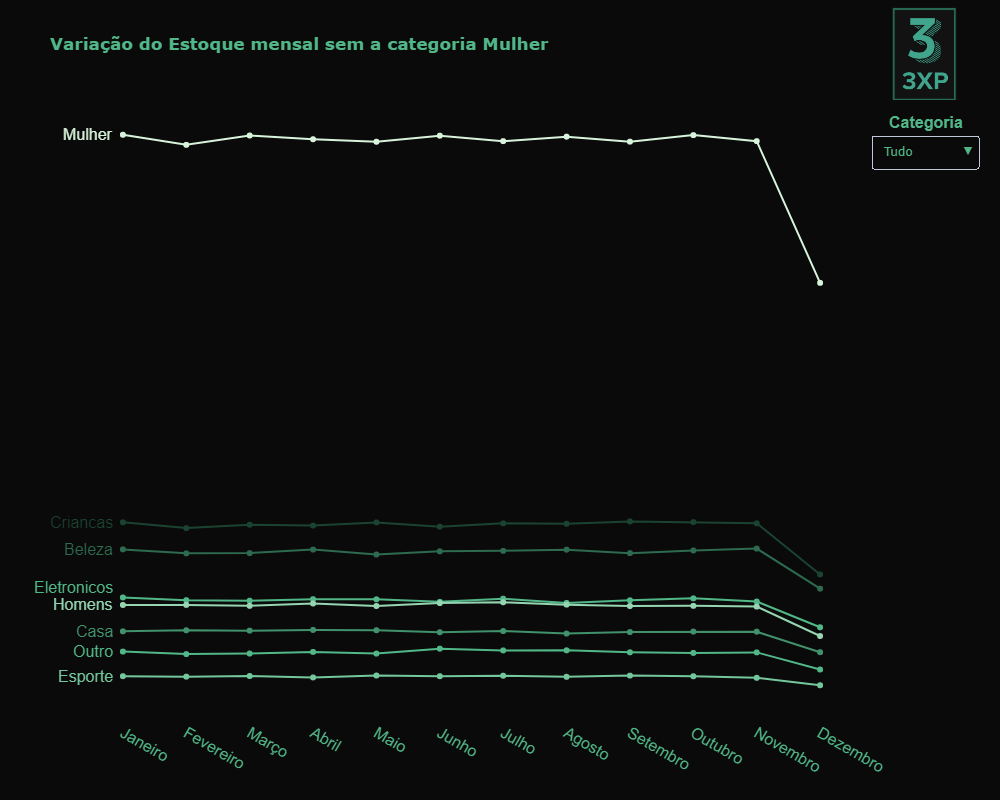

In [9]:
color = {'green_palette': ['#2d6a4f', '#40916c', '#1b4332', '#52b788', '#74c69d', '#95d5b2','#d8f3dc','#52b788']}
fig = go.Figure()
annotations = []
#lista de pontos de anotação
position_list = [0,10,11]
all_list = []

for i,j in zip(categories,color['green_palette']):
        #lista com o texto que será escrito
        texto = [int(round(x,0)) for x in estoque_preco[i][0]['Estoque'].reset_index(drop=True)]
        fig.add_trace(
        go.Scatter(
                x = estoque_preco[i][0]['Mês'].reset_index(drop=True),
                y = estoque_preco[i][0]['Estoque'].reset_index(drop=True),
                legendgroup = i,
                marker_color = j,
                name = i,
                showlegend = False
                        ))
        #conjunto de código responsável por realizar as anotações na plotagem da figura de várias categorias
        #é feito uma quantidade grande de anotações exclusivas, pois caso não seja feito, as anotações terão problema, visto que a referência do eixo y está o proprio eixo y e não o papel
        #condicional para inserir anotações da categoria eletronicos                
        if i == 'Eletronicos':
                fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+6000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ,))
                all_list.append(dict(xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+6000,
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))
        #anotação do restante das categorias
        else:
                fig.add_annotation(dict(xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))
                all_list.append(dict(xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                                        xanchor='right', yanchor='middle',
                                        text=i,
                                        font=dict(family='Arial',
                                                size=16,
                                                color = j),
                                        showarrow=False
                                        ))
#all list é uma lista que será feita para adicionar o plot de todas as categorias
all_list.append(dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))
#anot é um dicionário responsável por adicionar anotações exclusivas, agora para plots por categoria
anot = {}
for i in categories.keys():
        #anotações do dropdown da casa
        if i == 'Casa':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]-400,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.01,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=estoque_preco[i][0]['Mês'].reset_index(drop=True)[10],
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+500,
                        xref="x",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                        ]
        #anotações do dropdown de beleza
        elif i == 'Beleza':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.92,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de crianças
        elif i == 'Criancas':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+800,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.92,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+800,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de eletronicos
        elif i == 'Eletronicos':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11]-200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de esporte
        elif i == 'Esporte':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.065,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+100,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+200,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de homens
        elif i == 'Homens':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+500,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown de mulher
        elif i == 'Mulher':
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+2000,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+2000,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]
        #anotações do dropdown do restante das categorias
        else:
                anot[i] = [
                dict(
                        xref='paper', x=0.045, y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],
                        xanchor='right', yanchor='middle',
                        text=i,
                        font=dict(
                                family='Arial',
                                size=16,
                                color = j
                                ),
                        showarrow=False
                        ),
                dict(
                        xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False
                        ),
                dict(
                        x=0.05,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0]+400,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[0],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),
                dict(
                        x=1.015,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[11],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                ),  
                dict(
                        x=0.925,
                        y=estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10]+400,
                        xref="paper",
                        yref="y",
                        text=int(round(estoque_preco[i][0]['Estoque'].reset_index(drop=True)[10],0)),
                        showarrow=False,
                        font=dict(
                                family="Arial",
                                size=14,
                                color="#52b788"
                                ),
                )
                ]  
       

anot['Tudo'] = all_list

#configuração das anotações gerais e dos dropdowns
fig.update_layout(
    autosize = False,
    title = '<b style = "color:#52b788">Variação do Estoque mensal sem a categoria Mulher</b>',
    width=1000,
    height=800,
    paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
    plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
        updatemenus=[
                dict(
                buttons=list([
                        dict(
                        args=[{'visible': [True,True,True,True,True,True,True,True]},{'annotations': [i for i in anot['Tudo']]}],
                        label='Tudo',
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [True,False,False,False,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[0]]]}],
                        label=list(anot.keys())[0],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,True,False,False,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[1]]]}],
                        label=list(anot.keys())[1],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,True,False,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[2]]]}],
                        label=list(anot.keys())[2],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,True,False,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[3]]]}],
                        label=list(anot.keys())[3],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,True,False,False,False]},{'annotations': [i for i in anot[list(anot.keys())[4]]]}],
                        label=list(anot.keys())[4],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,False,True,False,False]},{'annotations': [i for i in anot[list(anot.keys())[5]]]}],
                        label=list(anot.keys())[5],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,False,False,True,False]},{'annotations': [i for i in anot[list(anot.keys())[6]]]}],
                        label=list(anot.keys())[6],
                        method="update"
                        ),
                        dict(
                        args=[{'visible': [False,False,False,False,False,False,False,True]},{'annotations': [i for i in anot[list(anot.keys())[7]]]}],
                        label=list(anot.keys())[7],
                        method="update"
                        ),
                ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.16,
            xanchor="right",
            y=0.96,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
        ]
)
#configuração do eixo x
fig.update_xaxes(showgrid=False,  color = '#52b788', 
                tickvals = [x for x in range(1,13)],
                ticktext = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro', 'Outubro','Novembro', 'Dezembro'],
                tickfont = dict(
                        family='Arial',
                        size=16,
                        color = '#52b788')
)
#configuração do eixo y
fig.update_yaxes(visible = False, showgrid=False)

# adiciona uma logo ao gráfico
fig.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.12, y=1.00,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)    
#adiciona a anotação para o dropdown
fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show()   

In [10]:
#é necessário renomear para que haja uma melhora visual no gráfico
google.rename(columns = {
        'Mercado Livre: (Brasil)':'Mercado Livre' , 
        'Americanas: (Brasil)':'Americanas',
        'Netshoes: (Brasil)': 'Netshoes',
        'Magazine Luiza: (Brasil)':'Magazine Luiza',
        'Submarino: (Brasil)':'Submarino'}, inplace = True)

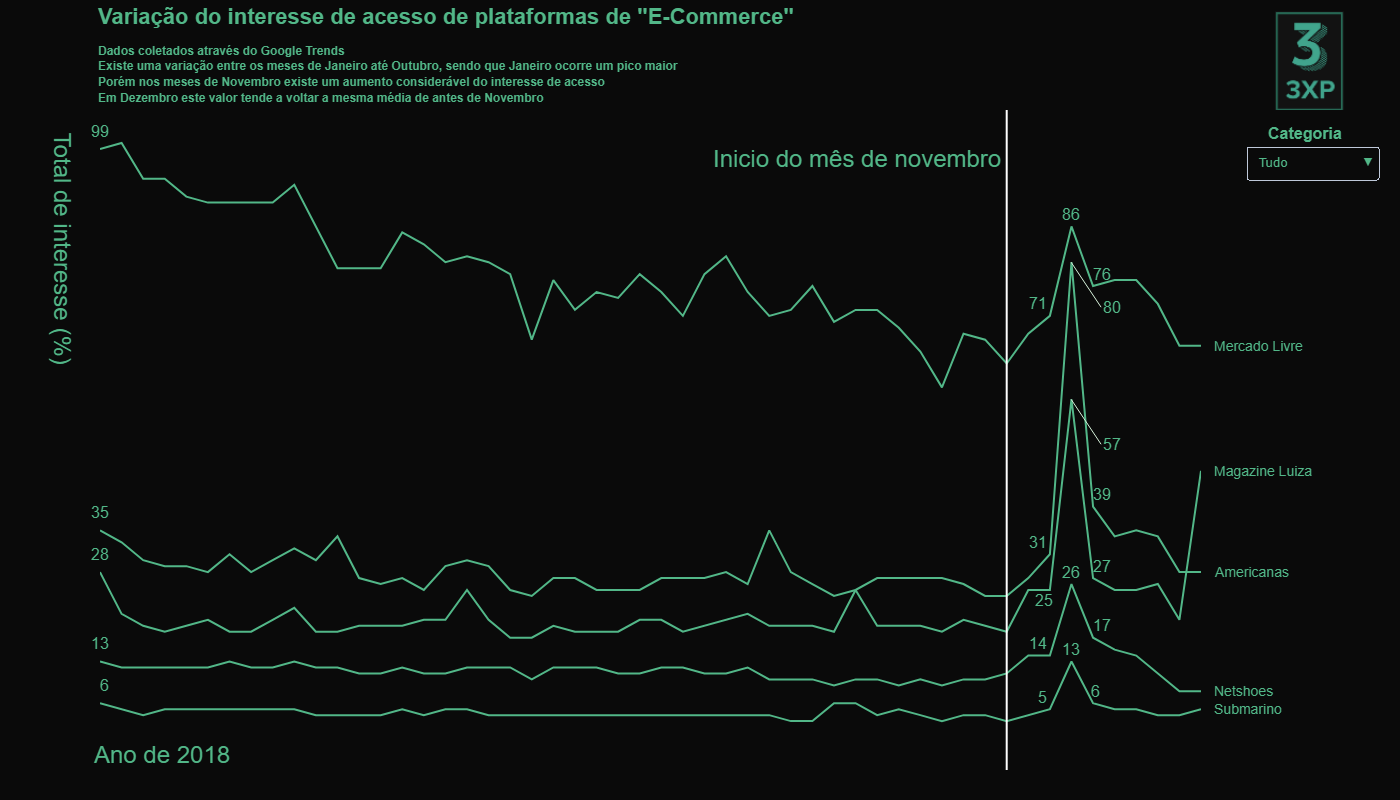

In [11]:
fig1 = go.Figure()

columns = ['Mercado Livre', 'Americanas',
       'Netshoes', 'Magazine Luiza',
       'Submarino']

#adição dos traços
fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[0]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[1]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[2]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[3]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)

fig1.add_trace(
go.Scatter(
        x = google['Semana'],
        y = google[columns[4]],
        name = columns[0],
        visible = True,
        marker_color = '#52b788',
        showlegend = False
)
)                             
        
#anotação específica dos gráficos 
anot = {}
for i in columns:
        #Adiciona o nome dos sites
        if i != 'Submarino':
                anot[i] = [dict(xref='paper', x=0.01, y=google[i][0]+3,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][0]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),
                        dict(xref='paper', x=0.86, y=google[i][44]+2,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][44]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),

                        dict(xref='paper', x=0.882, y=google[i][45]+2,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][45]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),
                                
                        dict(xref='paper', x=0.925, y=google[i][46]+3,
                        xanchor='right', yanchor='middle',
                        text=int(google[i][46]),
                        font=dict(family='Arial',
                                size=16,
                                color = '#52b788'),
                        showarrow=False),
                        dict(xref='paper', x=0.82, y=100,
                        xanchor='right', yanchor='top',
                        text='Inicio do mês de novembro',
                        font=dict(family='Arial',
                                size=24,
                                color = '#52b788'),
                        showarrow = False
                        ),
                        dict(xref='paper', x=-0.02, y=102,
                        xanchor='right', yanchor='top',
                        text='Total de interesse (%)',
                        font=dict(family='Arial',
                                size=24,
                                color = '#52b788'),
                        showarrow=False,
                        textangle=90
                        ),
                        dict(xref='paper', x=0.12, y=0,
                        xanchor='right', yanchor='top',
                        text='Ano de 2018',
                        font=dict(family='Arial',
                                size=24,
                                color = '#52b788'),
                        showarrow=False
                        ),
                        dict(xref='paper', x=1.01, y=google[i][51],
                                xanchor='left', yanchor='middle',
                                text=i,
                                font=dict(family='Arial',
                                        size=14,
                                        color = '#52b788'),
                        showarrow=False
                        ),
                        dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                        xanchor='right', yanchor='top',
                        text='<b>Categoria</b>',
                        font=dict(family='Arial',
                                size=16,
                                color ='#52b788'),
                        showarrow = False)]
        else:
                anot[i] = [dict(xref='paper', x=0.01, y=google[i][0]+3,
                xanchor='right', yanchor='middle',
                text=int(google[i][0]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),
                dict(xref='paper', x=0.86, y=google[i][44]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),

                dict(xref='paper', x=0.882, y=google[i][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),
                        
                dict(xref='paper', x=0.912, y=google[i][46]+3,
                xanchor='right', yanchor='middle',
                text=int(google[i][46]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False),
                dict(xref='paper', x=0.82, y=100,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow = False
                ),
                dict(xref='paper', x=-0.02, y=102,
                xanchor='right', yanchor='top',
                text='Total de interesse (%)',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False,
                textangle=90
                ),
                dict(xref='paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False
                ),
                dict(xref='paper', x=1.01, y=google[i][51],
                        xanchor='left', yanchor='middle',
                        text=i,
                        font=dict(family='Arial',
                                size=14,
                                color = '#52b788'),
                showarrow=False
                )]
        fig1.add_annotation(dict(xref='paper', x=1.01, y=google[i][51],
                        xanchor='left', yanchor='middle',
                        text=i,
                        font=dict(family='Arial',
                                size=14,
                                color = '#52b788'),
                        showarrow=False
                        ,))

        fig1.add_annotation(dict(xref='paper', x=0.01, y=google[i][0]+3,
                xanchor='right', yanchor='middle',
                text=int(google[i][0]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False
                ,))

        if i in ['Americanas', 'Magazine Luiza']:
                fig1.add_annotation(dict(xref='paper', x=0.882, y=google[i][45],
                xanchor='left', yanchor='middle',
                text=int(google[i][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=True,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=30,
                ay=45
                ))
        else:
                fig1.add_annotation(dict(xref='paper', x=0.892, y=google[i][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45
                ))
        if i == 'Magazine Luiza':
                fig1.add_annotation(dict(xref='paper', x=0.867, y=google[i][44],
                xanchor='right', yanchor='top',
                text=int(google[i][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=-10,
                ay=-40
                ))
        else:
                fig1.add_annotation(dict(xref='paper', x=0.862, y=google[i][44]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=-10,
                ay=-40
                ))
        if i == 'Submarino':
                fig1.add_annotation(dict(xref='paper', x=0.91, y=google[i][46]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][46]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=20,
                ay=-25
                ))
        else:
                fig1.add_annotation(dict(xref='paper', x=0.92, y=google[i][46]+2,
                xanchor='right', yanchor='middle',
                text=int(google[i][46]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=20,
                ay=-25
                ))

columns = ['Mercado Livre', 'Americanas',
       'Netshoes', 'Magazine Luiza',
       'Submarino']
all_list = []
#anotação de todos os gráficos
all_list.append([anot[columns[0]][7],anot[columns[1]][7],anot[columns[2]][7],anot[columns[3]][7],anot[columns[4]][7],
                anot[columns[0]][0],anot[columns[1]][0],anot[columns[2]][0],anot[columns[3]][0],anot[columns[4]][0],
                anot[columns[0]][1],anot[columns[1]][1],anot[columns[2]][1],anot[columns[4]][1],
                anot[columns[0]][3],anot[columns[1]][3],anot[columns[2]][3],anot[columns[3]][3],anot[columns[4]][3],
                dict(xref='paper', x=0.892, y=google[columns[0]][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[columns[0]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45),
                dict(xref='paper', x=0.892, y=google[columns[2]][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[columns[2]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45),
                dict(xref='paper', x=0.892, y=google[columns[4]][45]+2,
                xanchor='right', yanchor='middle',
                text=int(google[columns[4]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=50,
                ay=-45),
                dict(xref='paper', x=0.882, y=google[columns[1]][45],
                xanchor='left', yanchor='middle',
                text=int(google[columns[1]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=True,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=30,
                ay=45),
                dict(xref='paper', x=0.867, y=google[columns[3]][44],
                xanchor='right', yanchor='top',
                text=int(google[columns[3]][44]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=False,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=-10,
                ay=-40
                ),
                dict(xref='paper', x=0.882, y=google[columns[3]][45],
                xanchor='left', yanchor='middle',
                text=int(google[columns[3]][45]),
                font=dict(family='Arial',
                        size=16,
                        color = '#52b788'),
                showarrow=True,
                arrowhead=0,
                arrowsize=0.8,
                arrowwidth=1,
                arrowcolor="#d8f3dc",
                ax=30,
                ay=45),
                dict(xref='paper', x=0.82, y=100,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow = False
                ),
                dict(xref='paper', x=-0.02, y=102,
                xanchor='right', yanchor='top',
                text='Total de interesse (%)',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False,
                textangle=90
                ),
                dict(xref='paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = '#52b788'),
                showarrow=False
                ),
                dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False)])
#diminui a dimensionalidade da lista
all_list = flatten_list(flatten_list(all_list))

anot['Tudo'] = all_list

#anotação do layout da figura
fig1.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Variação do interesse de acesso de plataformas de "E-Commerce"</br></b><b style = "color:#52b788"><br>Dados coletados através do Google Trends</br>Existe uma variação entre os meses de Janeiro até Outubro, sendo que Janeiro ocorre um pico maior<br>Porém nos meses de Novembro existe um aumento considerável do interesse de acesso<br>Em Dezembro este valor tende a voltar a mesma média de antes de Novembro</b>',
                'font_family':"Arial",
                'font_size':12,
                'y': 0.99,
                'x': 0.07,
                'xanchor': 'left',
                'yanchor': 'top'},
        margin=dict(
        l=100,
        r=150,
        b=30,
        t=110,
        pad=5
        ),
        width=1400,
        height=800,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico 
        updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'visible': [True,True,True,True,True]},{'annotations': [i for i in anot['Tudo']]}],
                    label='Tudo',
                    method="update"
                ),
                dict(
                    args=[{'visible': [True,False,False,False,False]},{'annotations': [i for i in anot[columns[0]]]}],
                    label=columns[0],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,True,False,False,False]},{'annotations': [i for i in anot[columns[1]]]}],
                    label=columns[1],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,False,True,False,False]},{'annotations': [i for i in anot[columns[2]]]}],
                    label=columns[2],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,False,False,True,False]},{'annotations': [i for i in anot[columns[3]]]}],
                    label=columns[3],
                    method="update"
                ),
                dict(
                    args=[{'visible': [False,False,False,False,True]},{'annotations': [i for i in anot[columns[4]]]}],
                    label=columns[4],
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.17,
            xanchor="right",
            y=0.96,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
    ],)
#nome do eixo y
fig1.add_annotation(dict(xref='paper', x=-0.02, y=102,
                xanchor='right', yanchor='top',
                text='Total de interesse (%)',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow=False,
                textangle=90
                ))

#nome do eixo x
fig1.add_annotation(dict(xref='paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow=False
                ))   
#linha vertical branca
fig1.add_vline(x=google['Semana'][42], line_color = 'white')
#anotação da linha vertical branca
fig1.add_annotation(dict(xref='paper', x=0.82, y=100,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow = False
                ))
#configuração dos eixos
fig1.update_xaxes(showgrid=False,showticklabels=False, visible = False)
fig1.update_yaxes(showgrid=False,visible = False)
#titulo do dropdown
fig1.add_annotation(dict(xref='paper', yref = 'paper', x=1.13, y=0.98,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# adiciona uma logo ao gráfico
fig1.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.13, y=1.00,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig1.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################
# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO 
# fig1.show() 

In [12]:
#função de divisão de data
def date_division(frame_dict):
    #todas as datas, dividas por dia
    dates_all = {}
    for i in categories:
        dates_all[i] = categories[i].copy()
        dates_all[i]['Data'] = dates_all[i]['Data'].astype('str')
        dates_all_unique = dates_all[i]['Data'].unique()
        count_all = {}
        for j in dates_all_unique:
            count_all[j] = dates_all[i].query(f'Data == "{j}"')['Data'].count()
        dates_all[i] = pd.Series(count_all ,index = [i for i in count_all.keys()])
        dates_all[i] = dates_all[i].reset_index().rename(columns={0:'Total', 'index':'Data'})
        dates_all[i]['Data'] = pd.to_datetime(dates_all[i]['Data'])
        dates_all[i].sort_values(by = ['Data'], inplace= True)
    #divisão de 15 em 15 dias
    dates_15 = {}
    for i in frame_dict:
        dates_15[i] = frame_dict[i].copy()
        dates_15[i]['Data'] = dates_15[i]['Data'].astype('str')
        dates_15_unique = dates_15[i]['Data'].unique()
        interval_list = np.arange(0,347,15)
        interval_list = np.append(np.delete(np.arange(0,347,15), np.argwhere(interval_list == interval_list[-1:]), None), 347)
        count_all = {}
        for j in interval_list:
            if j != interval_list[-1:]:
                total = dates_15_unique[j:j+15] 
                count_all[j] = dates_15[i].loc[dates_15[i]['Data'].isin(total)]['Data'].count()
            else:
                total = dates_15_unique[interval_list[len(interval_list)-2]:interval_list[len(interval_list)-1]] 
                count_all[j] = dates_15[i].loc[dates_15[i]['Data'].isin(total)]['Data'].count()                
        dates_15[i] = pd.Series(count_all ,index = [i for i in count_all.keys()])
        dates_15[i] = dates_15[i].reset_index().rename(columns={0:'Total', 'index':'Dias'})
        dates_15[i].sort_values(by = ['Dias'], inplace= True)
    #divisão de 7 em 7 dias
    dates_7 = {}
    for i in frame_dict:
        dates_7[i] = frame_dict[i].copy()
        dates_7[i]['Data'] = dates_7[i]['Data'].astype('str')
        dates_7_unique = dates_7[i]['Data'].unique()
        interval_list = np.arange(0,347,7)
        interval_list = np.append(np.delete(np.arange(0,347,7), np.argwhere(interval_list == interval_list[-1:]), None), 347)
        count_all = {}
        for j in interval_list:
            if j != interval_list[-1:]:
                total = dates_7_unique[j:j+7] 
                count_all[j] = dates_7[i].loc[dates_7[i]['Data'].isin(total)]['Data'].count()
            else:
                total = dates_7_unique[interval_list[len(interval_list)-2]:interval_list[len(interval_list)-1]] 
                count_all[j] = dates_7[i].loc[dates_7[i]['Data'].isin(total)]['Data'].count()                
        dates_7[i] = pd.Series(count_all ,index = [i for i in count_all.keys()])
        dates_7[i] = dates_7[i].reset_index().rename(columns={0:'Total', 'index':'Dias'})
        dates_7[i].sort_values(by = ['Dias'], inplace= True)
    return dates_all, dates_15, dates_7

In [13]:
date_everyday,date_15,date_7 = date_division(categories)

In [14]:
#configuração dos botões
buttons_1 = [dict(method = "restyle",
                 args = [{"type": "scatter",
                     'x': [date_everyday[k]['Data'].values, 'undefined'],
                     'y': [date_everyday[k]['Total'].values, 'undefined'],
                     'visible':[True, False, False],
                     'showlegend': False}], 
                 label = k)  for k in date_everyday]

buttons_2 = [dict(method = "restyle",
                 args = [{"type": "scatter",
                     'x': ['undefined' ,date_15[k]['Dias'].values, 'undefined'],
                     'y': ['undefined' ,date_15[k]['Total'].values, 'undefined'],
                     'visible':[False, True, False],
                     'showlegend': False}], 
                 label = k)  for k in date_15]

buttons_3 = [dict(method = "restyle",
                 args = [{"type": "scatter",
                     'x': ['undefined','undefined', date_7[k]['Dias'].values],
                     'y': ['undefined','undefined', date_7[k]['Total'].values],
                     'visible':[False, False, True],
                     'showlegend': False}], 
                 label = k)  for k in date_7]

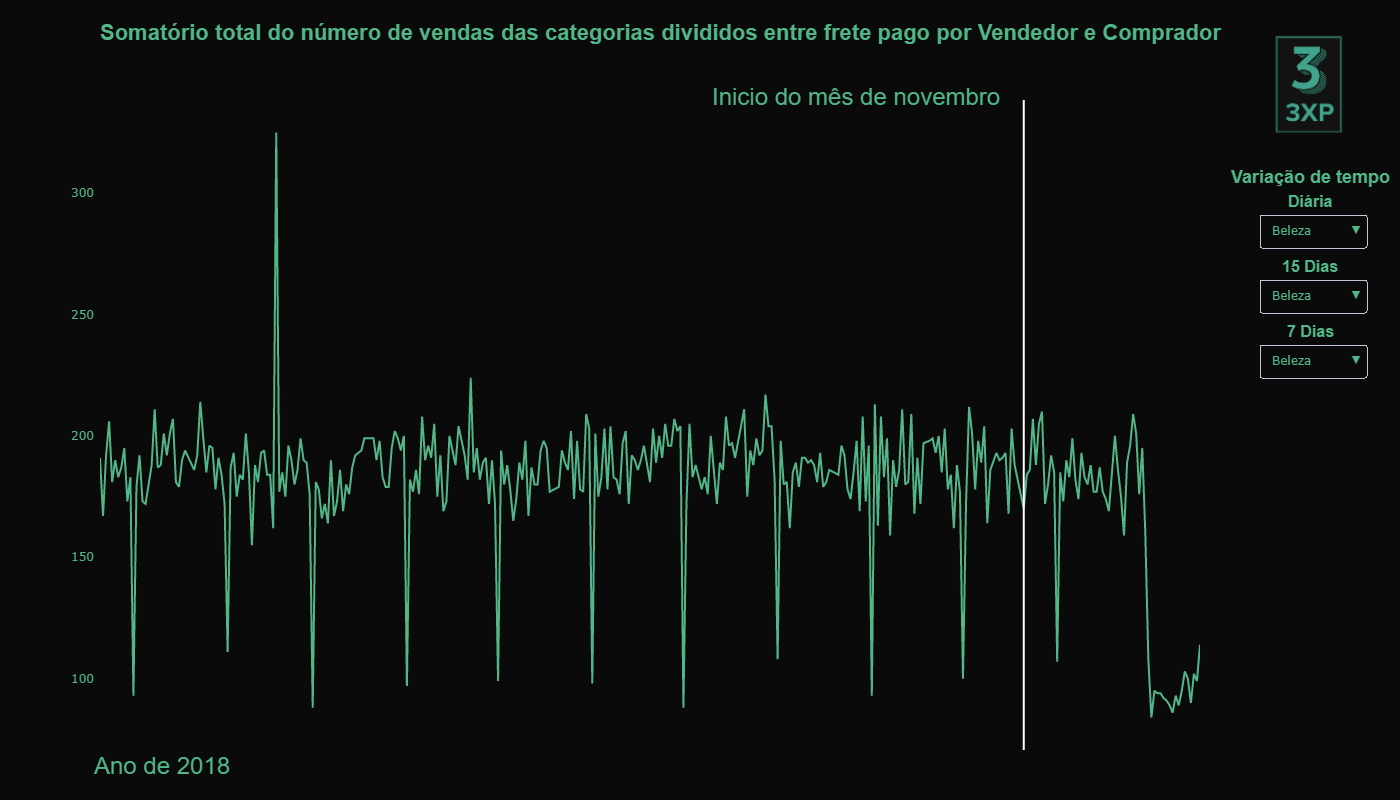

In [15]:
fig = go.Figure()
#adição dos traços
fig.add_trace(
      go.Scatter
      (
      y = date_everyday['Homens']['Total'].values,
      x = date_everyday['Homens']['Data'].values,
      name = 'Frete pelo comprador',
      marker_color = '#52b788',
    )
)

fig.add_trace(
    go.Scatter(
    y = date_15['Homens']['Total'].values,
    x = date_15['Homens']['Dias'].values,
    name = 'Frete pelo comprador',
    marker_color = '#52b788',
    visible = False
    )
)

fig.add_trace(
    go.Scatter(
    y = date_7['Homens']['Total'].values,
    x = date_7['Homens']['Dias'].values,
    name = 'Frete pelo comprador',
    marker_color = '#52b788',
    visible = False
    )
)

#configuração do dropdown e layout
fig.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Somatório total do número de vendas das categorias divididos entre frete pago por Vendedor e Comprador</br>',
                'font_family':"Arial",
                'font_size':12,
                'xref' :'paper',
                'y': 0.97,
                'x': 0,
                'xanchor': 'left',
                'yanchor': 'bottom'},
        margin=dict(
        l=100,
        r=200,
        b=50,
        t=100,
        pad=5
        ),
        width=1400,
        height=800,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
        yaxis = dict(tickfont=dict(color="#52b788")),
        updatemenus=[
        dict(
            buttons= buttons_1,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.16,
            xanchor="right",
            y=0.84,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
        dict(
            buttons= buttons_2,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.16,
            xanchor="right",
            y=0.74,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
        dict(
            buttons= buttons_3,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.16,
            xanchor="right",
            y=0.64,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        ),
    ],
       
)
#adiciona a anotação do titulo das categorias
fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.1, y=0.90,
                xanchor='center', yanchor='top',
                text='<b>Variação de tempo</b>',
                font=dict(family='Arial',
                        size=18,
                        color ='#52b788'),
                showarrow = False
                ))

fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.1, y=0.86,
                xanchor='center', yanchor='top',
                text='<b>Diária</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.1, y=0.66,
                xanchor='center', yanchor='top',
                text='<b>7 Dias</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.1, y=0.76,
                xanchor='center', yanchor='top',
                text='<b>15 Dias</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# adiciona uma logo ao gráfico
fig.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.13, y=0.95,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)
#anotação do eixo x
fig.add_annotation(dict(xref='paper', yref = 'paper', x=0.12, y=0,
                xanchor='right', yanchor='top',
                text='Ano de 2018',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow=False
                ))
#anotação da linha vertical
fig.add_vline(x=str(292), line_color = 'white') 

fig.add_vline(x=str(date_everyday['Homens'].reset_index(drop=True)['Data'][289]), line_color = 'white')
#anotação da linha vertical
fig.add_annotation(dict(xref='paper', yref = 'paper', x=0.82, y=1.03,
                xanchor='right', yanchor='top',
                text='Inicio do mês de novembro',
                font=dict(family='Arial',
                        size=24,
                        color = "#52b788"),
                showarrow = False
                ))
#configuração dos eixos
fig.update_xaxes(showgrid=False, visible = False)
fig.update_yaxes(showgrid=False, zerolinecolor = 'rgb(10,10,10)', )
# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################
# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show() 

In [16]:
condicao = {}
for i in categories:
    condicao[i] = [categories[i].query('Frete == "Produto fretado pelo Vendedor"')['Preço'].sort_values().cumsum().reset_index(drop = True), categories[i].query('Frete == "Produto fretado pelo Comprador"')['Preço'].sort_values().cumsum().reset_index(drop = True)]

In [17]:
#configuração do botão
buttons_fig = [dict(method = "restyle",
                 args = [{"type": "scatter",
                     'x': [condicao[k][1].index.values, condicao[k][0].index.values],
                     'y': [condicao[k][1].values, condicao[k][0].values],
                     'showlegend': True}], 
                 label = k)  for k in condicao]

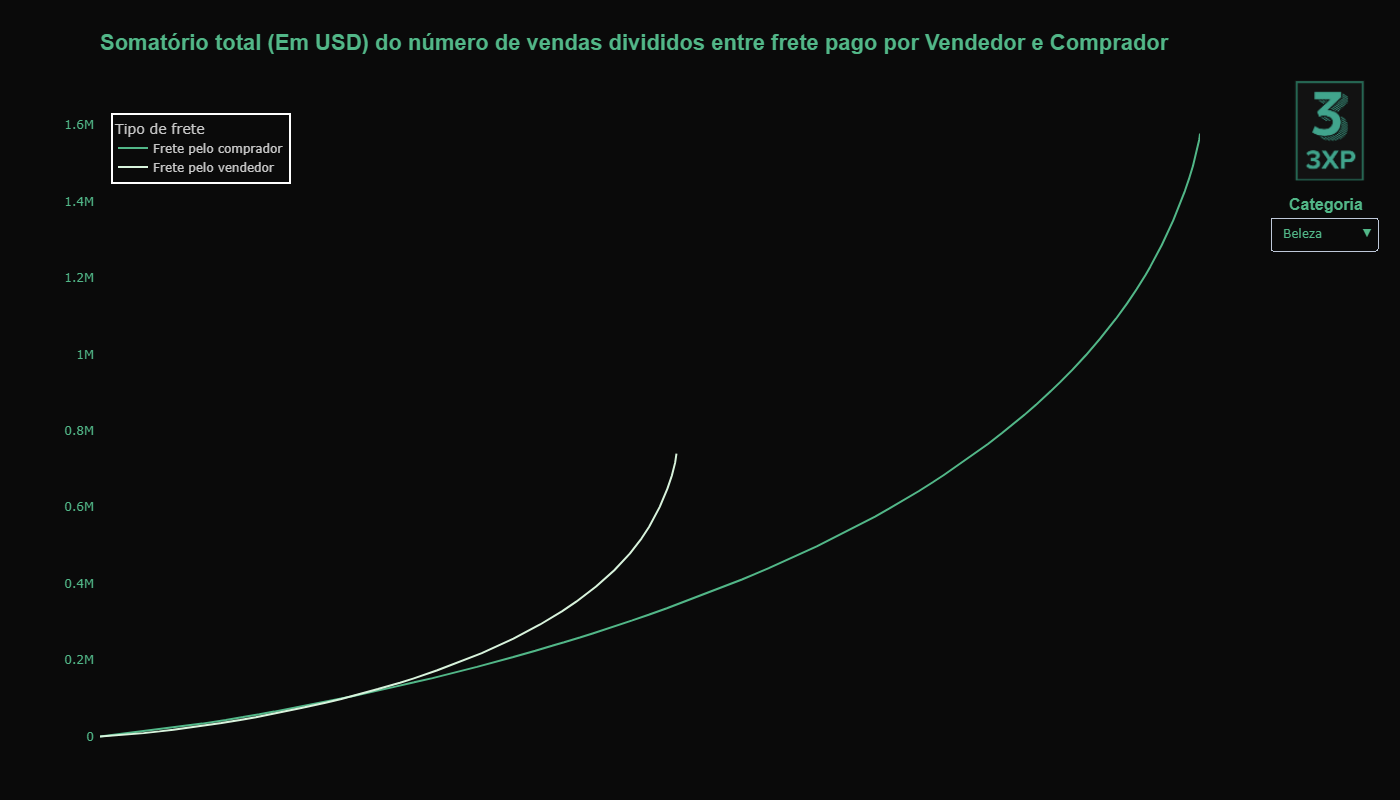

In [18]:
fig = go.Figure()
#adição dos traços
fig.add_trace(
      go.Scatter
      (
      x = condicao['Homens'][1].index.values,
      y = condicao['Homens'][1].values,
      name = 'Frete pelo comprador',
      marker_color = '#52b788',
      showlegend = True,
    )
)

fig.add_trace(
      go.Scatter
      (
      x = condicao['Homens'][0].index.values,
      y = condicao['Homens'][0].values,
      name = 'Frete pelo vendedor',
      marker_color = '#d8f3dc',
      showlegend = True
    )
)

#configuração dos dropdowns e layouts
fig.update_layout(
        title = {'text': '<b  style = "color:#52b788;font-size:22"><br>Somatório total (Em USD) do número de vendas divididos entre frete pago por Vendedor e Comprador</br>',
                'font_family':"Arial",
                'font_size':14,
                'xref' :'paper',
                'y': 0.96,
                'x': 0,
                'xanchor': 'left',
                'yanchor': 'bottom'},
        margin=dict(
        l=100,
        r=200,
        b=30,
        t=100,
        pad=5
        ),
        width=1400,
        height=800,
        paper_bgcolor = 'rgb(10,10,10)', # cor de fundo do papel do gráfico
        plot_bgcolor = 'rgb(10,10,10)', # cor de fundo do gráfico
        updatemenus=[
                    dict(
            buttons= buttons_fig,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.17,
            xanchor="right",
            y=0.84,
            yanchor="top",
            font = dict(color="#52b788"),
            bgcolor = 'rgb(10,10,10)'
        )],
    yaxis = dict(tickfont=dict(color="#52b788")),
    legend=dict(
    yanchor="top",
    y=0.98,
    xanchor="left",
    x=0.01,
    font_color = "rgb(200,200,200)",
    title = 'Tipo de frete',
    bordercolor="rgb(256,256,256)",
    bgcolor = 'rgb(10,10,10)',
    borderwidth=2
))
#adiciona o titulo do dropdown
fig.add_annotation(dict(xref='paper', yref = 'paper', x=1.15, y=0.86,
                xanchor='right', yanchor='top',
                text='<b>Categoria</b>',
                font=dict(family='Arial',
                        size=16,
                        color ='#52b788'),
                showarrow = False
                ))

# adiciona uma logo ao gráfico
fig.add_layout_image(
        dict(
                source='https://i.imgur.com/ik6ADIS.png',
                xref="paper", yref="paper",
                x=1.15, y=0.88,
                sizex=0.15, sizey=0.15,
                xanchor="right", yanchor="bottom" # define a origem do logo
        )
)
#configuração dos eixos
fig.update_xaxes(showgrid=False, visible = False)
fig.update_yaxes(showgrid=False, zerolinecolor = 'rgb(10,10,10)')

# COMENTAR ESTE CÓDIGO CASO QUEIRA INTERAGIR COM O GRÁFICO ABAIXO
img_bytes = fig.to_image(format="png")
display_png((img_bytes), raw = True)
##################################################################

# USAR CODIGO ABAIXO CASO QUERIA INTERAGIR COM O GRÁFICO
# fig.show() 

# COMENTÁRIOS SOBRE A HIPÓTESE



Em relação a tempo, os dados fornecem uma visão totalmente errada da realidade, comparando com o gráfico apresentado das empresas do Mercado Livre, Americanas, Submarino, Netshoes e Maganize Luiza, ele não apresenta uma sazonalidade viável, podemos dizer que eles mais parecem um exame médico do que uma sazonalidade, então podemos descartar a coluna tempo, por conta de conter dados que não irão ajudar dentro dos modelos de inteligência artificial, com isso a hipótese de sazonalidade de torna <b>FALSA</b>, ela não impacta em nada nos dados.

Em relação ao frete, podemos concluir é bem variado em relação a categoria, temos categorias em que os produtos que são fretados pelo comprador são mais caros e temos outras que são totalmente o contrário então a hipótese pode ser concluida sendo uma <b>CONTRADIÇÃO</b> (contradição pode ser definida quando uma hipótese contêm saídas tanto verdadeiras como falsas)